### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restauran
ts.
### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### 1 Data Cleaning Process
**Importing necessary libraries**

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Enable graphical display 
%matplotlib inline

**Importing the dataset**

In [3]:
data = pd.read_csv(r"C:\Users\j040m\Music\DataScience_material\UCAN_Data Cleaning material\tarefa 1\Foodhub_order.csv")

**View the first and last 5 rows of the dataset**

In [169]:
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


In [170]:
data.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.310,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.180,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.220,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.180,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.450,Weekend,Not given,28,24


**Understand the shape of the dataset**
* Question 1:
* How many variable and observation are present in the data?

In [171]:
# checking shape of the data
print("There are", data.shape[0], 'rows/observation and', data.shape[1], "columns/variable.")

There are 1898 rows/observation and 9 columns/variable.


**Check the data types of the columns for the dataset**
* Question 2:
* What are the datatypes of the different columns/variable in the dataset?

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


* in total, We have 1 float data type, 4 integers and 4 objects. The Rating column has the wrong data type. Order ID, and Customer ID are also categorical variables with numerical labels. We may want to amend them accordingly


**let's see why rating variable has object data type**

In [4]:
data['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

* As we can see, there are some order's that did not receive a rating, so we would first have to talk to SME to see if we can change the data that was received, if they do not approve, we will work that way, if they approve we will have to convert the same date so that it can later be observed with the other numerical variables.
* to enable change of data type, we can reassign the 'Not given' rating the number zero number. This will enable us to convert the rating column to a numeric data type without compromising the observations



**if aprove we will have to convert the data in the fallowing way:**

In [5]:
#replacing values with nan
data['rating']=data['rating'].replace(['Not given'],0)

#changing the data type to float
#astype(),apply()nfillna(0)
data=data.astype({"rating": float, "order_id": object, "customer_id": object})

**let's check the data type of columns again, to see the change**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   object 
 1   customer_id            1898 non-null   object 
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 133.6+ KB


* We see that the data types have been fixed.
* There are 4 numerical variable and 5 object type variable in the data.
* We observe that rating variable have less entries that other columns (less than 1898 observation/row) which indicates the presence of missing values in the data.

**Checking for missing values in the data**
* Question 3:
* Are there any missing values in the data? If yes, treat them using an appropriate method

In [7]:
data.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

* We do not have any null values in the data frame, hence it requires no treatment, however we note that we did not have reviews for all the orders, for which we replaced the 'Not given' with 0

**Checking for duplicate entries in the data**

In [181]:
data.duplicated().sum()

np.int64(0)

* There's no duplicate entries in the data. 

**Let's check the statistical summary of the data.**
* Question 4:
* Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cost_of_the_order,1898.000,16.499,7.484,4.470,12.080,14.140,22.297,35.410
rating,1898.000,2.660,2.195,0.000,0.000,4.000,5.000,5.000
food_preparation_time,1898.000,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,24.162,4.973,15.000,20.000,25.000,28.000,33.000


* `cost_of_the_order`: On average, the price of a meal is 16,499 in a restaurant. 75% of restaurants charge a price not exceeding 22,297. There are some where the price can reach 35,410.
  
* `food_preparation_time`: On average, restaurants take around 27,372 minutes to prepare their meals, with the minimum preparation time being 20 minutes, but there are dishes that take 35 minutes to be ready.

* `Rating`: The minimum rating is 3 stars and the maximum is 5 stars.
  
* `delivery_time`: On average, a delivery can take 24,162 minutes to reach the customer, with a minimum time of 15 minutes and a maximum of 33 minutes.

Question 5: How many orders are not rated?

In [11]:
# Write the code here
# Check the rating value, noting that we assigned the rating 'Not given' a value of zero
data['rating'].value_counts(dropna=False)

rating
0.000    736
5.000    588
4.000    386
3.000    188
Name: count, dtype: int64

* Having converted the rating 'Not Given' value to zero, the count of zeros represent the same hence 736 orders were not rated.

**Check the restaurant with the minimum delivery time**

In [9]:
data.describe(include="object").T

,count,unique,top,freq
order_id,1898,1898,1477147,1
customer_id,1898,1200,52832,13
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351


**we can check what restaurants have the minimum delivery time**

In [184]:
data[data['delivery_time']==15]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3.000,25,15
42,1477267,133637,RedFarm Broadway,Chinese,24.250,Weekend,5.000,22,15
55,1476562,129486,Mamoun's Falafel,Mediterranean,14.120,Weekend,3.000,31,15
89,1478384,184085,Hill Country Fried Chicken,Southern,14.790,Weekend,5.000,35,15
122,1477255,50199,Five Guys Burgers and Fries,American,12.130,Weekend,NaN,26,15
...,...,...,...,...,...,...,...,...,...
1759,1478243,159626,Blue Ribbon Sushi,Japanese,29.100,Weekend,4.000,21,15
1776,1477694,192317,Shake Shack,American,24.300,Weekend,4.000,25,15
1845,1477966,318451,Blue Ribbon Sushi,Japanese,24.300,Weekend,NaN,29,15
1858,1477335,84457,Nobu Next Door,Japanese,29.150,Weekend,NaN,27,15


* As we can see there are 87 matches for restaurants that have a 15 min delivery time.
* This minimum time is probably related to the dishes that the restaurants make, if a restaurant has at least 2 dishes with this delivery time then we have to consider that the restaurant will be repeated, for this it is convenient to filter only the names that are not repeated
* we can see that the restaurant "Blue Ribbon Sushi" is being repeated atlest 3 times or more in the list above

**we can check the number of restaurant that is repetead**

In [185]:
data.restaurant_name[data.delivery_time==15].duplicated().sum()

np.int64(46)

* we can see that there are 46 restaurants that have the minimum delivery time but are being duplicated, so from this: 87-46=41, so we need to have the name of 41 restaurant that the name isn't being duplicated, whereas the previous value of 87 took into account the same restaurants.

**Lastly, we only have to know the name of these restaurants that have the minimum time and aren't duplicated**

In [186]:
#check the number of restaurant that are'nt duplicated
number_of_restaurant_not_duplicated=data.restaurant_name[data.delivery_time==15].drop_duplicates().count()
number_of_restaurant_not_duplicated

np.int64(41)

In [66]:
#checking the name of the restaurant
number_of_restaurant_not_duplicated=data.restaurant_name[data.delivery_time==15].drop_duplicates()
number_of_restaurant_not_duplicated

3           Blue Ribbon Fried Chicken
42                   RedFarm Broadway
55                   Mamoun's Falafel
89         Hill Country Fried Chicken
122       Five Guys Burgers and Fries
171                      Cafe Mogador
183                 The Meatball Shop
238               Bhatti Indian Grill
241          Yama Japanese Restaurant
248                        Bareburger
283                       Shake Shack
374                            Hibino
376                       CafÌ© China
432      Tarallucci e Vino Restaurant
506                         The Smile
516                      Room Service
538                          Rubirosa
542                     P.J. Clarke's
554                      Burger Joint
556                  ilili Restaurant
574                 Gaia Italian Cafe
576                 Blue Ribbon Sushi
610                       Han Dynasty
658                    RedFarm Hudson
740                    Nobu Next Door
929                    The MasalaWala
966         

* Now we can really see which restaurants have the minimum delivery time exclusively

##### Let's check the count and percentage of categorical levels in each column

In [12]:
# Making a list of all categorical variables
cat_cols =  ['restaurant_name', 'cuisine_type','day_of_the_week']

# Printing the count of unique categorical levels in each column
for column in cat_cols:
    print(data[column].value_counts())
    print("-" * 50)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64
--------------------------------------------------
cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64
--------------------------------------------------
day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64
--------------------------------------------------


In [16]:
# Printing the percentage of unique categorical levels in each column
for column in cat_cols:
    print(data[column].value_counts(normalize=True))
    print("-" * 50)

restaurant_name
Shake Shack                 0.115
The Meatball Shop           0.070
Blue Ribbon Sushi           0.063
Blue Ribbon Fried Chicken   0.051
Parm                        0.036
                             ... 
Sushi Choshi                0.001
Dos Caminos Soho            0.001
La Follia                   0.001
Philippe Chow               0.001
'wichcraft                  0.001
Name: proportion, Length: 178, dtype: float64
--------------------------------------------------
cuisine_type
American         0.308
Japanese         0.248
Italian          0.157
Chinese          0.113
Mexican          0.041
Indian           0.038
Middle Eastern   0.026
Mediterranean    0.024
Thai             0.010
French           0.009
Southern         0.009
Korean           0.007
Spanish          0.006
Vietnamese       0.004
Name: proportion, dtype: float64
--------------------------------------------------
day_of_the_week
Weekend   0.712
Weekday   0.288
Name: proportion, dtype: float64
-------------

**Observations**
* Highest number (219) of customer are from shake shack followed by 132 customer's of The Meatball Shop.
* Most of the cuisine type (584 or 30,8%) are of type american cuisine followed by 470 or 24,8% of japanese type. The least number (7 or 0,04%) is of cuisine type that are from vietnamese.
* Top period of request are on weekend with atlest 71,2%.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

**Let's check the distribution for numerical columns.**
* Question 6:
* Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.)

**Observations on delivery time**

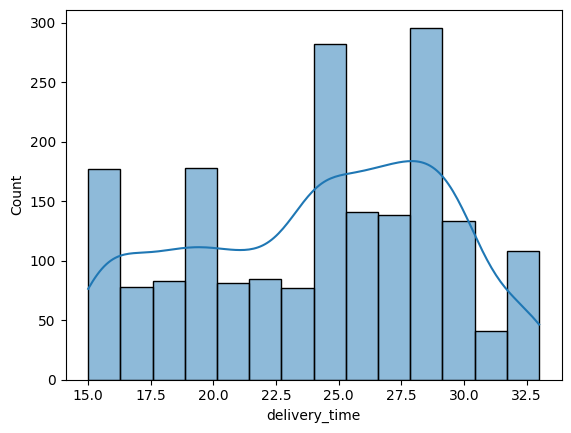

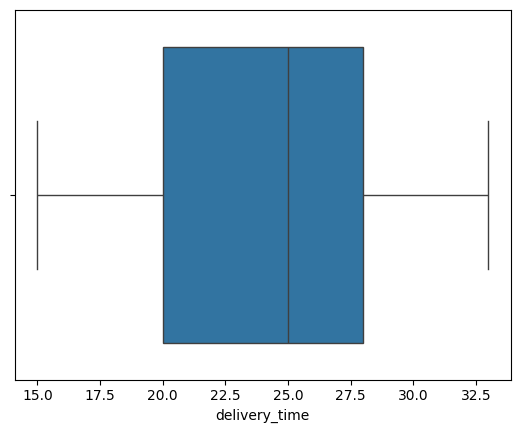

In [39]:
sns.histplot(data = data, x='delivery_time', stat = 'count',kde = True,)
plt.show()
sns.boxplot(data = data, x='delivery_time')
plt.show()

* The median delivery time is about 25 minutes with the observations being skewed to the left. From the histplot we can determine that most orders take between 25 and 28 minutes to be delivered.

**Observations on food preparation time**

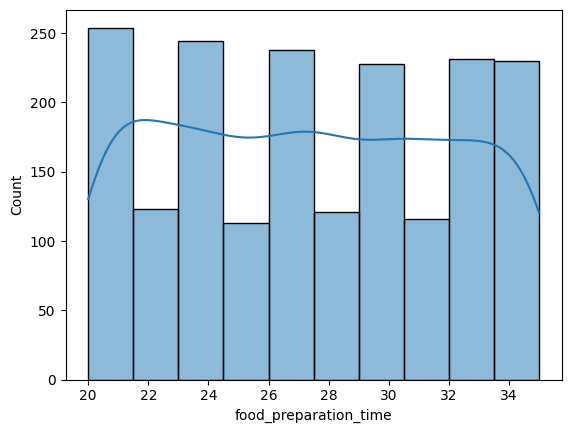

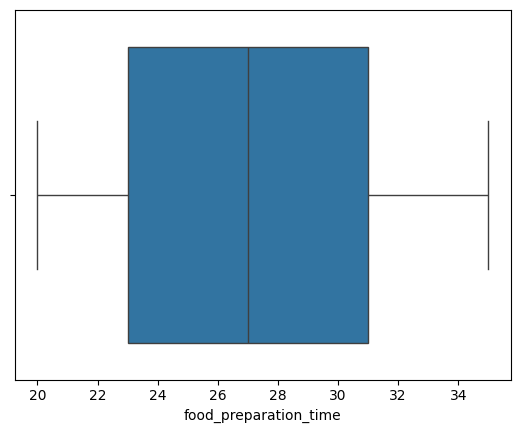

In [36]:
sns.histplot(data = data, x='food_preparation_time',bins = 10, stat = 'count',kde = True)
plt.show()
sns.boxplot(data = data, x='food_preparation_time')
plt.show();

* There is a fairly even distribution of the time it takes to prepare the dish between 20 minutes and 36 minutes with a median of about 27 minutes

**Observations on cost of the order**

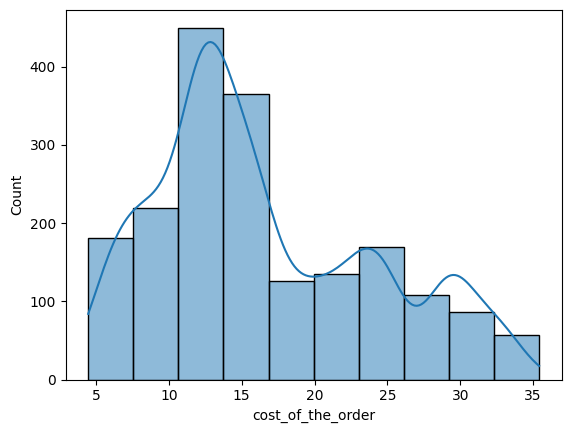

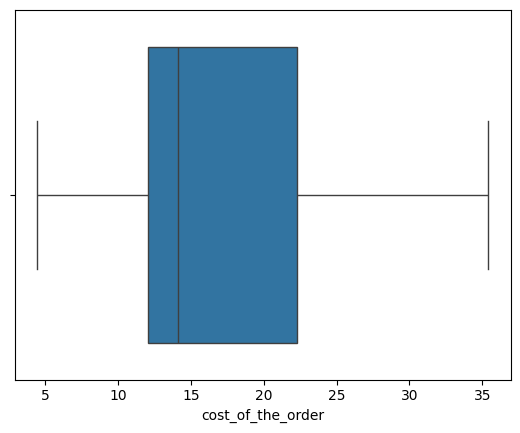

In [23]:
sns.histplot(data=data,x='cost_of_the_order',bins=10,stat='count',kde=True)
plt.show()
sns.boxplot(data=data,x='cost_of_the_order')
plt.show()

* The distribution is skewed towards the left.  
* There aren't outliers present in this column/variable
* We note that there is a slight peak at around 25 dollars. The boxplot indicates that the median cost is about 14 dollars, with the orders being right skewed. This implies a a bigger spread above the median. Given that we have two main target markets students and working professionals, it would be good to note if they are the cause of the two peaks with the probability of the well-off professionals being on the right peak and students concentrating on the main and left peak.

**Observations on rating**

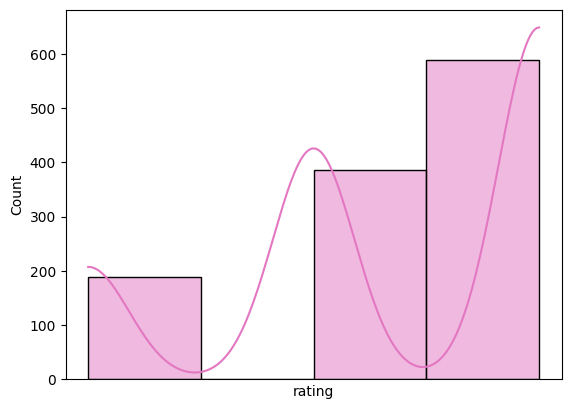

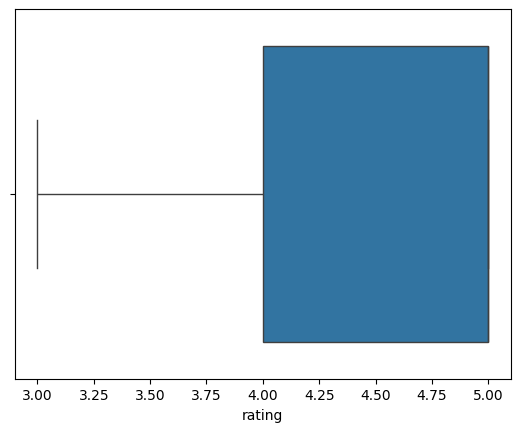

In [34]:
# it's prefereble to eliminate unrated rows to prevent bias
data_not_unrated=data[data['rating']!=0]

sns.histplot(data=data_not_unrated,x='rating',bins=4, stat='count', kde=True)
plt.show()
sns.boxplot(data = data_not_unrated, x='rating')
plt.show()

* For the rated orders,considering that there are about 38.77% unrated orders, the histplot shows that the ratings are concentrated around the maximum rating, but the boxplot is heavily skewed to the left such that we do not have the right whisker.

**Observations on cuisine type**

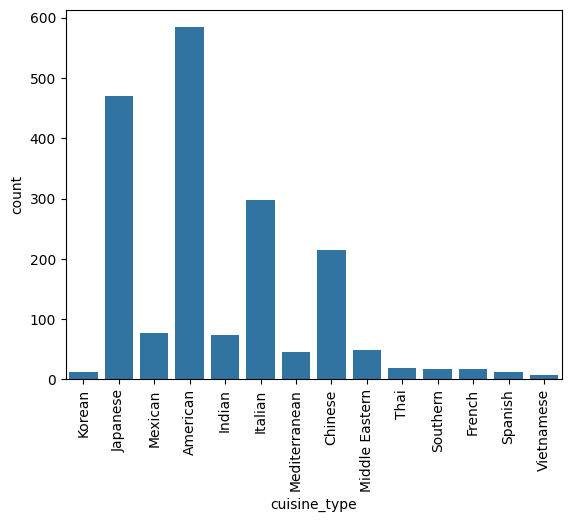

In [25]:
sns.countplot(data=data,x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

* The most popular cuisines are American, Japanese,Italian,Chinese in that order, followed with a close tie between Mexican and Indian.

**Checking the data at once(numeral) ...histogram**

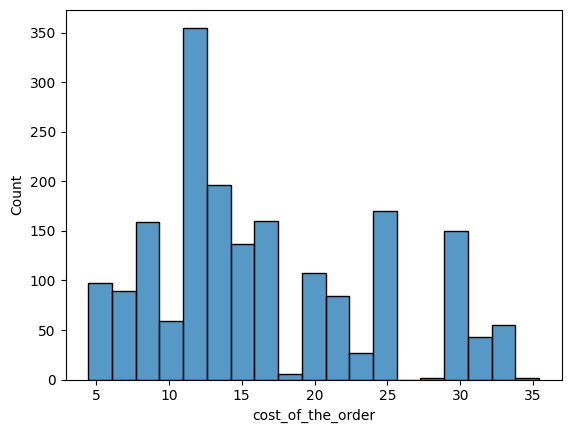

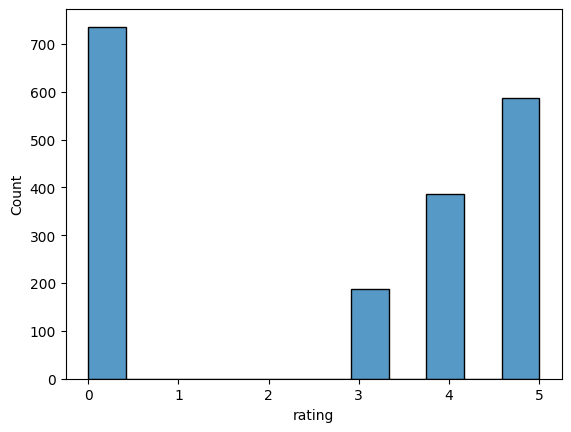

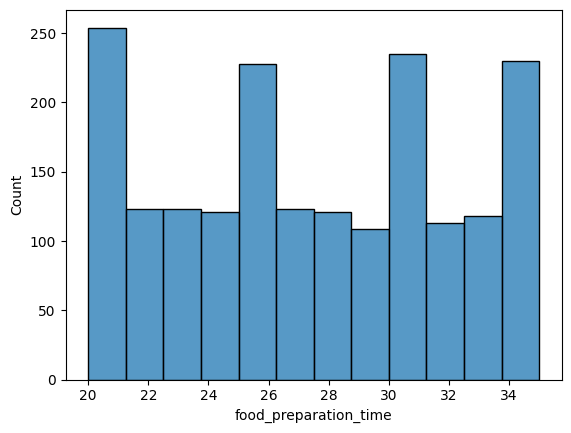

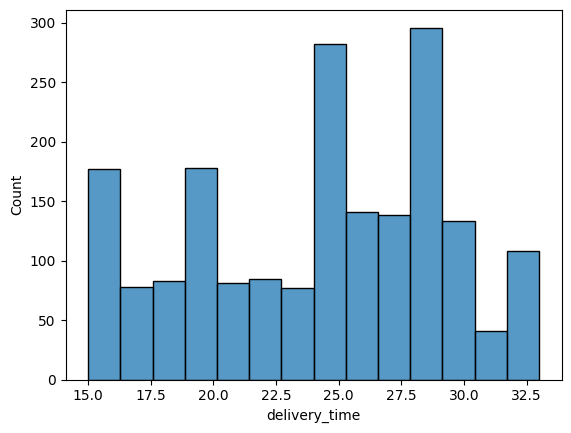

In [42]:
#histogram to understand the distribuition
for i in data.select_dtypes(include="number").columns:
    sns.histplot(data=data,x=i)
    plt.show()

**we can also check the outliers at once**

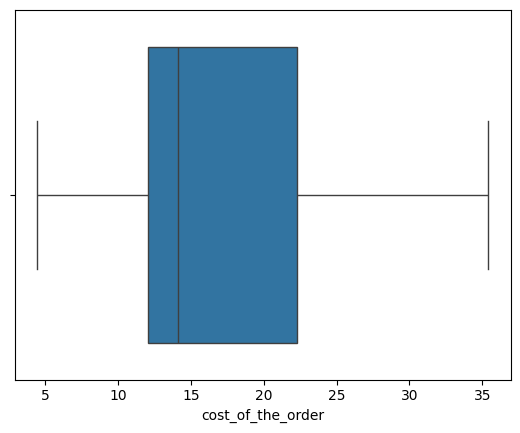

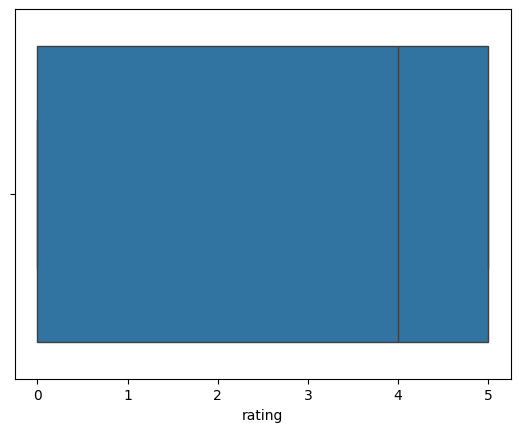

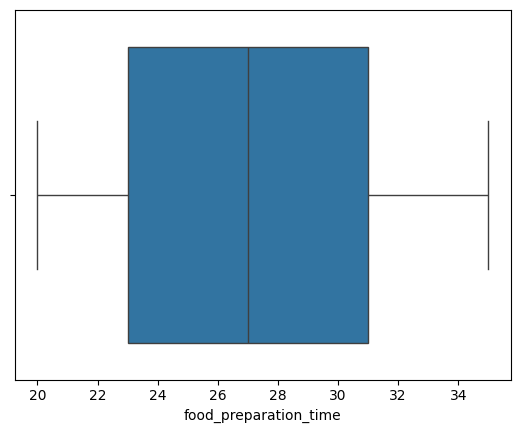

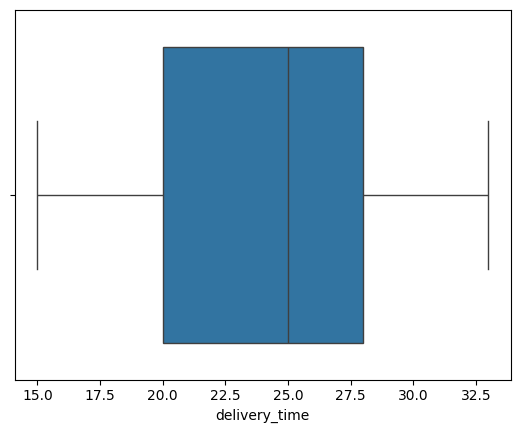

In [43]:
for i in data.select_dtypes(include="number").columns:
    sns.boxplot(data=data,x=i)
    plt.show()

**Question 7: Which are the top 5 restaurants in terms of the number of orders received?**

In [44]:
data[['restaurant_name','order_id']].groupby('restaurant_name').count().sort_values(by = 'order_id',axis = 0, ascending=False).head(5)

,order_id
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


* Shake Shack is the leading restaurant with 219 orders, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken & Parm have 132, 119, 96 & 68 orders respectively and together make up the top 5 restaurants in terms of orders processed

**Which is the most popular cuisine on weekends?**

In [47]:
# The code first filters observations for the Weekend only, then  grouping the output by Cuisine Type. We count the order IDs 
# for each Cuisine, then we order the observations so that the Cuisine with most orders is at the top. Optionally we limit the
#output to 5
data[data['day_of_the_week'] =='Weekend'].groupby('cuisine_type').count().sort_values(by = 'order_id',axis = 0, ascending=False).head(5)

,order_id,customer_id,restaurant_name,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
cuisine_type,,,,,,,,
American,415,415,415,415,415,415,415,415
Japanese,335,335,335,335,335,335,335,335
Italian,207,207,207,207,207,207,207,207
Chinese,163,163,163,163,163,163,163,163
Mexican,53,53,53,53,53,53,53,53


* American Cuisine Type is the most popular during the weekends with a count of 415 orders

**Question 9: What percentage of the orders cost more than 20 dollars?**

In [49]:
# Do a count of total orders
total_observations = data['cost_of_the_order'].count()
# Do a count of orders with cost above $20
orders_above20 = data['cost_of_the_order'][data['cost_of_the_order']> 20].count()
# Compute the percent of the orders above $20
percentage_above20 = round((orders_above20/total_observations)*100,2) # Rounded to two decimal places
percentage_above20

29.24

* 29.24% of Total orders cost more than 20 dollars

**Question 10: What is the mean order delivery time?**

In [50]:
avr_del_time = round(data[['delivery_time']].agg('mean'),2) # Rounded to two decimal places
print(avr_del_time)

delivery_time   24.160
dtype: float64


* On average it takes 24.16 minutes to have the prepared orders delivered

**Question 11: The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed.**

In [51]:
data[['order_id','customer_id']].groupby('customer_id').count().sort_values(by = 'order_id',axis = 0, ascending=False).head(10)

,order_id
customer_id,
52832,13
47440,10
83287,9
250494,8
65009,7
82041,7
259341,7
276192,7
60052,6


* Having extracted the top 10 most frequent customers, it reveals that there is a tie of four clients with the 5th highest order count. The company may have to use the total amount spent by these customers ,or some other parameter, to be a tie-breaker or make a decision on how to address the multiple customers with the same qualifying score.Otherwise they should provision to reward 8 customers instead of 5.

### 3 Bivariate Analysis

**Check the relations between variable**

* Question 12: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

**Correlation  with heatmap to interpret the relation and multicolliniarity**

In [52]:
#relantionship between each one to other's
data.select_dtypes(include="number").corr()

,cost_of_the_order,rating,food_preparation_time,delivery_time
cost_of_the_order,1.000,0.050,0.042,-0.030
rating,0.050,1.000,0.001,-0.004
food_preparation_time,0.042,0.001,1.000,0.011
delivery_time,-0.030,-0.004,0.011,1.000


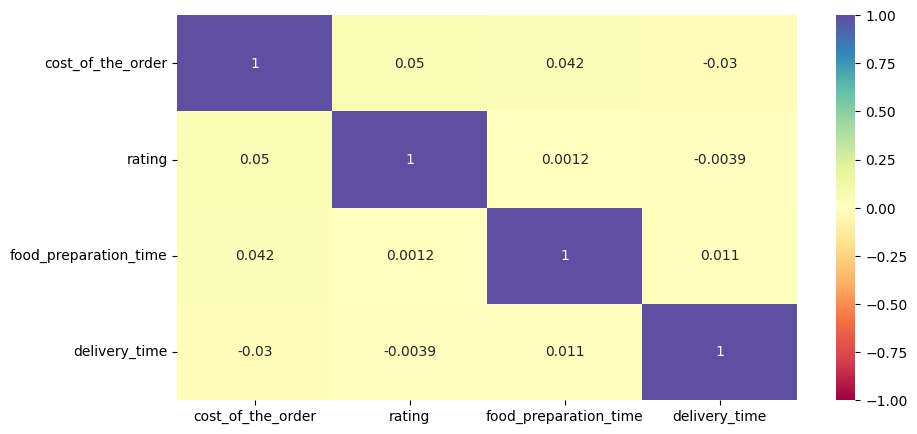

In [53]:
plt.figure(figsize=(10,5))
sns.heatmap(data.select_dtypes(include="number").corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

**Observations on the Heatmap and pairplot**
* The heatmap sometimes shows very weak correlation between the variables.

**Observations on Orders per cuisine per day of the week**

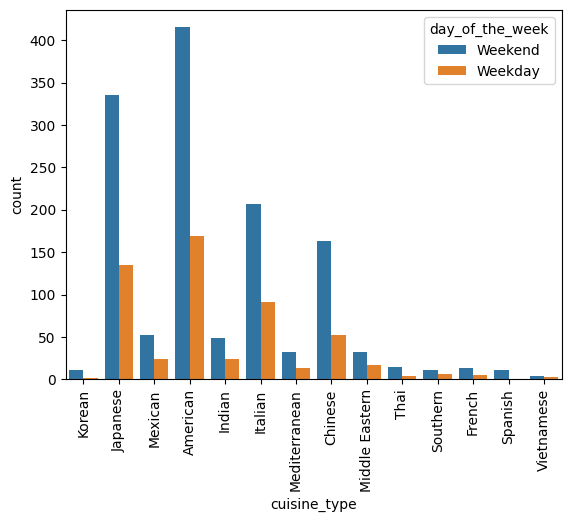

In [55]:
sns.countplot(data=data,x='cuisine_type',hue= 'day_of_the_week')
plt.xticks(rotation=90)
plt.show()

* We note that the pattern of popularity of cuisine folllow the same pattern irrespective of the day of the week. However the demand is generally low during the weekdays

**Observations on Spread Cost of Order**

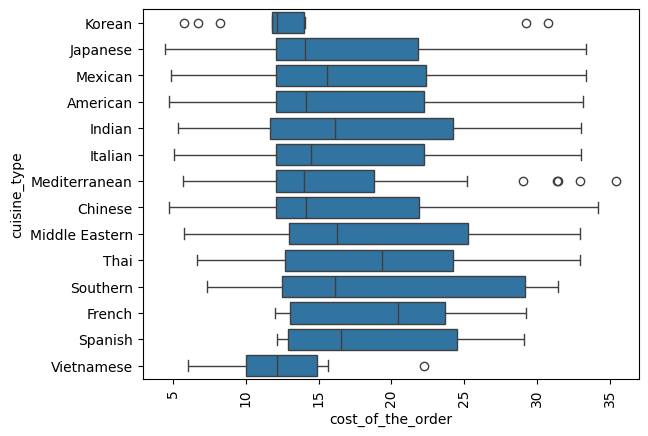

In [57]:
sns.boxplot(data=data,x='cost_of_the_order',y='cuisine_type')
plt.xticks(rotation=90)
plt.show();

* Most cuisines have varying degrees of skewed costs with afew having outliers such as Korean, Mediterranean and Vietnamese



**Observations on Day of the week against the other variables**

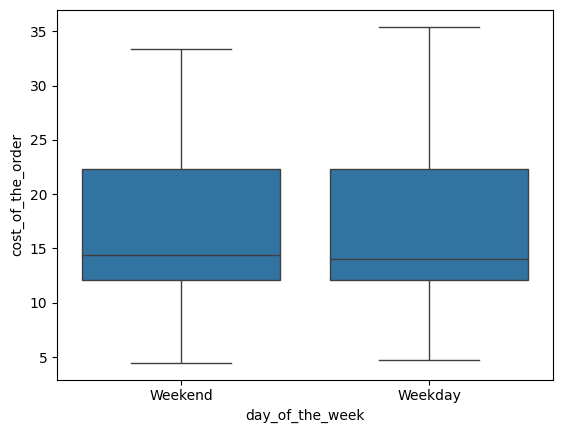

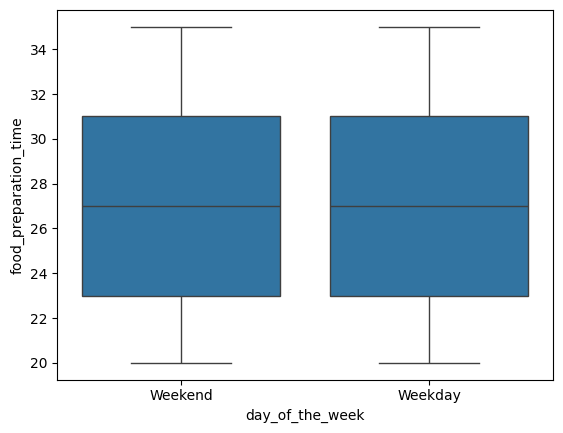

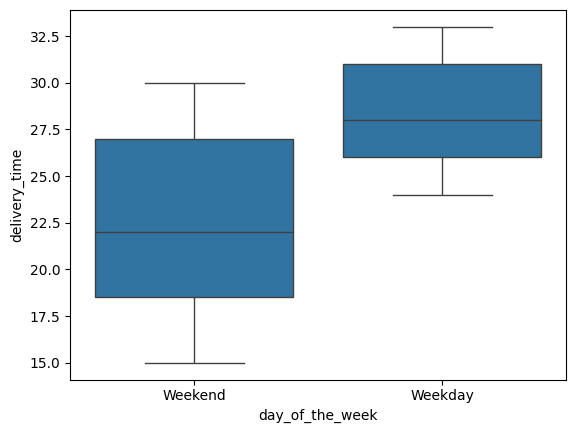

In [59]:
sns.boxplot(data=data,x='day_of_the_week',y='cost_of_the_order') 
plt.show()
sns.boxplot(data=data,x='day_of_the_week',y='food_preparation_time') 
plt.show()
sns.boxplot(data=data,x='day_of_the_week',y='delivery_time') 
plt.show()

* We note a steady spread of observations irrespective of the day of the week, except for delivery time which generally takes longer during the weekdays than during the weekends. The median delivery time for weekends is around 22.5 minutes while that of the weekdays is about 28.5 minutese

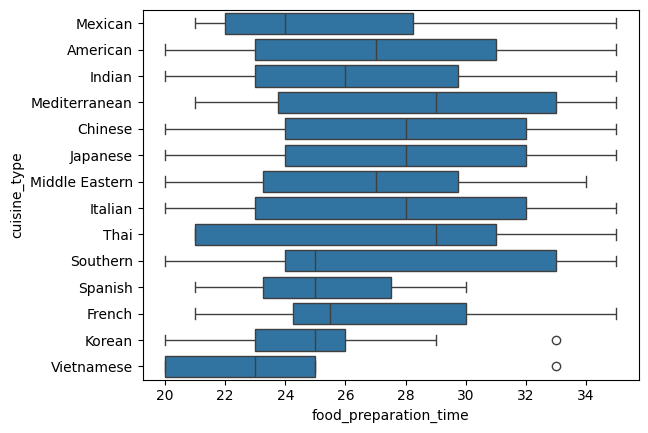

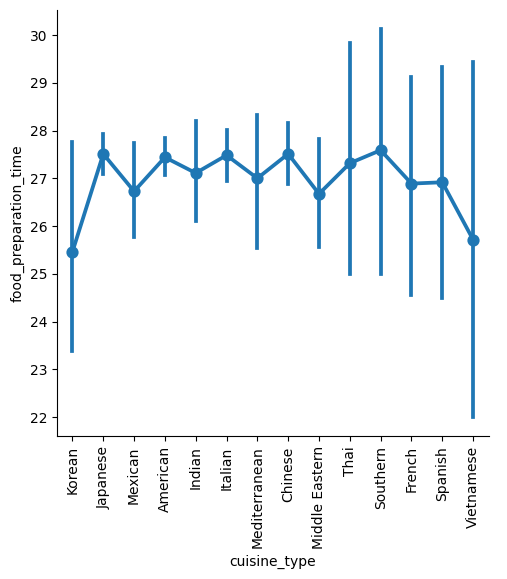

In [97]:
sns.boxplot(data=data_not_unrated,x='food_preparation_time',y='cuisine_type')
plt.show()
sns.catplot(data = data, x = 'cuisine_type',y = 'food_preparation_time',kind = 'point')
plt.xticks(rotation=90)
plt.show()

* Most cuisine types have more or less the same average preparation time although some have a larger spread of the 95% confidence interval.

### Conclusions:
Below is a summary of Key observations and conclusions
1. With <b>rating</b> concentrated around the high score of 5, its possible that mostly its the very satisfied customers that bother to rate the service. However alot of data about (38%) is lost in the unrated orders. A curious question that would arise is whether the unrated orders would skew the rating in a different direction
2. Whereas the cost of orders peak at around 13 dollars, there is a slight peak around 25 dollars as well making the observations bimodal
3. There is a consistent popularity structure of the cuisines irrespective of the day of the week although demand is significantly higher over the weekends.
4. Preparation time is relatively consistent as compared to delivery time, meaning delivery time is the significant variable in total preparation time (total time between order and delivery to customer).
5. There is a tie of 4 customers on the the 5th position given the reward criteria proposed. It requires further analysis or decision on how to handle such.

### Recommendations:
Based on the observations in this analysis below is recommended.
1. Improve the customers' response rating their orders, that is, reduce the rating 'Not given' on the orders. If possible entice them with a reward or follow up to know why they opt not to rate the service. This is so that better data can be available to determine customer satisfaction and enable service improvements
2.  The bimodal peak on the cost of orders processed may imply a differenciated market segment, possibly the  peak at 15 dollars has a higher concentration of students with the peak at 25 dollars having a higher concentration of the more affluent professionals. Further analysis of the customers' demographics may better reveal this. 
3. Given the consistent popularity of the cuisines across the days of the week, better marketing can be focused on the weekday to boost sales.
4. To improve on total order time (the total time taken between the customer placing the order and receiving their delivery) a review on how to bring down delivery time can be assessed to improve on overall service. A curious question also arises on whether the high delivery time is the cause of low orders during the weekdays.A review of whether customers shun ordering on weekdays because they anticipate a longer processing time for their order. Also could weekday traffic be the cause of the higher delivery time on weekdays?
5. On promotional offers the organization will have to consider a tie-breaker for cases where customers have the same score. A decision will be required to either reward all of them, considering the financial implication, or factor other aspects to distinguish the customers such as the amount spent by each one of the customers in a tie.